1. Importação das Bibliotec


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import warnings
from scipy import stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

2. Configurações Visuais

In [102]:
plt.style.use('ggplot')
sns.set_palette("husl")
warnings.filterwarnings('ignore')


In [103]:
import warnings
# Suprimir apenas avisos específicos, se necessário
warnings.filterwarnings('ignore', category=DeprecationWarning)  # Exemplo para avisos de depreciação
# Ou usar um contexto para partes específicas:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Código que gera avisos

3. Configurações do Pandas


In [89]:
# Configurações para visualização do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

4. Extração de Dados


In [108]:
def extrair_dados_api(url, local_path="backup_data.json"):
    """
    Extrai dados de uma API ou arquivo local e converte para DataFrame.
    Args:
        url (str): URL da API ou arquivo JSON.
        local_path (str): Caminho para arquivo local de backup.
    Returns:
        pd.DataFrame: DataFrame com os dados extraídos ou None se falhar.
    """
    if os.path.exists(local_path):
        print("Carregando dados do arquivo local...")
        try:
            return pd.read_json(local_path)
        except Exception as e:
            print(f"Erro ao carregar arquivo local: {e}")

    try:

        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        df.to_json(local_path)  # Salvar backup
        print("Dados extraídos com sucesso!")
        print(f"Shape do dataset: {df.shape}")
        return df
    except requests.exceptions.HTTPError as http_err:
        print(f"Erro HTTP ao acessar a API: {http_err}")
        return None
    except requests.exceptions.ConnectionError as conn_err:
        print(f"Erro de conexão: {conn_err}")
        return None
    except ValueError as json_err:
        print(f"Erro ao processar JSON: {json_err}")
        return None
    except Exception as e:
        print(f"Erro inesperado: {e}")
        return None

# URL da API
url_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Extraindo os dados
df_original = extrair_dados_api(url_api)

# Verificar se os dados foram extraídos com sucesso
if df_original is None:
    raise SystemExit("Falha na extração dos dados. Encerrando execução.")

# Visualizando primeiras linhas e informações básicas
print("\nPrimeiras 5 linhas do dataset:")
display(df_original.head())
print("\nInformações do dataset:")
print(df_original.info())
print("\nValores ausentes:")
print(df_original.isnull().sum())

Carregando dados do arquivo local...

Primeiras 5 linhas do dataset:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'N...","{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': ..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No...","{'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charg..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtecti...","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', '..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtect...","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', '..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtecti...","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Char..."



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 397.4+ KB
None

Valores ausentes:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


5. Pré Processamento de dados

In [109]:
# Desaninhar colunas
df_customer = pd.json_normalize(df_original['customer'])
df_phone = pd.json_normalize(df_original['phone'])
df_internet = pd.json_normalize(df_original['internet'])
df_account = pd.json_normalize(df_original['account'])

# Renomear colunas para evitar conflitos
df_customer.columns = [f'customer_{col}' for col in df_customer.columns]
df_phone.columns = [f'phone_{col}' for col in df_phone.columns]
df_internet.columns = [f'internet_{col}' for col in df_internet.columns]
df_account.columns = [f'account_{col}' for col in df_account.columns]

# Combinar com o DataFrame original
df = pd.concat([df_original[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# Codificar a coluna Churn como numérica
le = LabelEncoder()
df['Churn_numeric'] = le.fit_transform(df['Churn'])  # Converte 'Yes'/'No' para 1/0

# Verificar tipos de dados após desaninhamento
print("\nTipos de dados após desaninhamento:")
print(df.dtypes)

# Converter colunas de charges para float
df['account_Charges.Monthly'] = pd.to_numeric(df['account_Charges.Monthly'], errors='coerce')
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')



Tipos de dados após desaninhamento:
customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges.Monthly      float64
account_Charges.Total         object
Churn_numeric                  int64
dtype: object


6. ANÁLISE EXPLORATÓRIA



Estatísticas descritivas das variáveis numéricas:


,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly,account_Charges.Total,Churn_numeric
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,1.226366
std,0.369074,24.571773,30.129572,2268.632997,0.486627
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.425000,400.225000,1.000000
50%,0.000000,29.000000,70.300000,1391.000000,1.000000
75%,0.000000,55.000000,89.875000,3785.300000,2.000000
max,1.000000,72.000000,118.750000,8684.800000,2.000000



Matriz de correlação:


,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly,account_Charges.Total,Churn_numeric
customer_SeniorCitizen,1.000000,0.018187,0.220388,0.103499,0.129071
customer_tenure,0.018187,1.000000,0.247982,0.825118,-0.307073
account_Charges.Monthly,0.220388,0.247982,1.000000,0.652109,0.173298
account_Charges.Total,0.103499,0.825118,0.652109,1.000000,-0.172300
Churn_numeric,0.129071,-0.307073,0.173298,-0.172300,1.000000


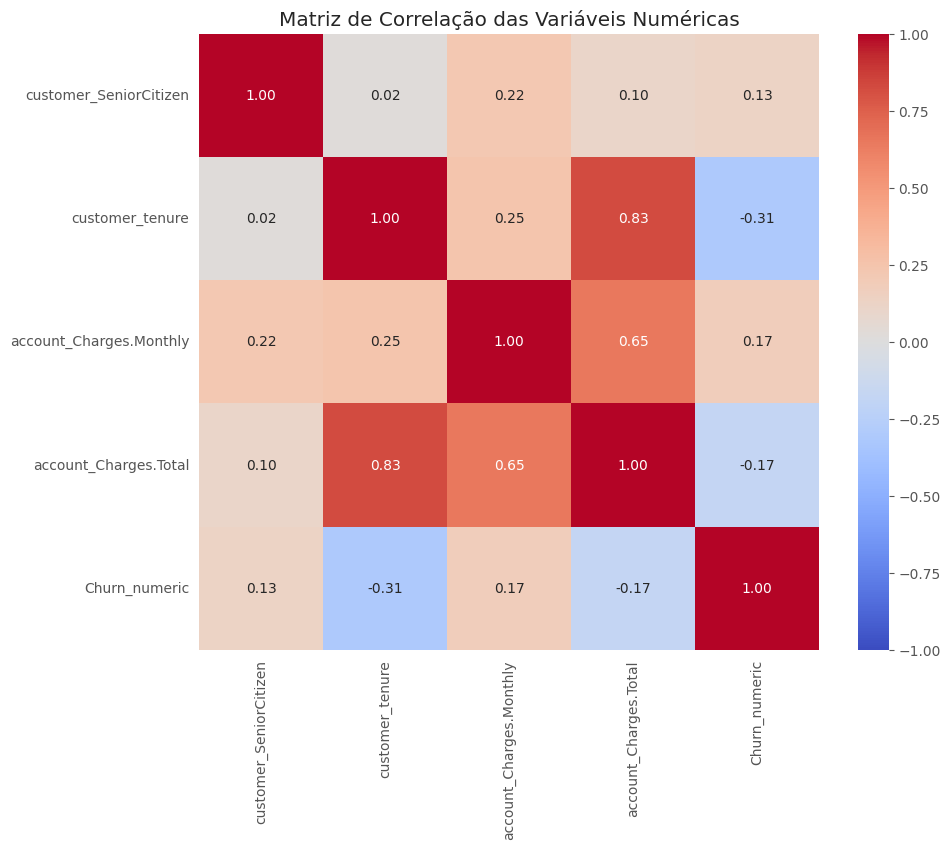

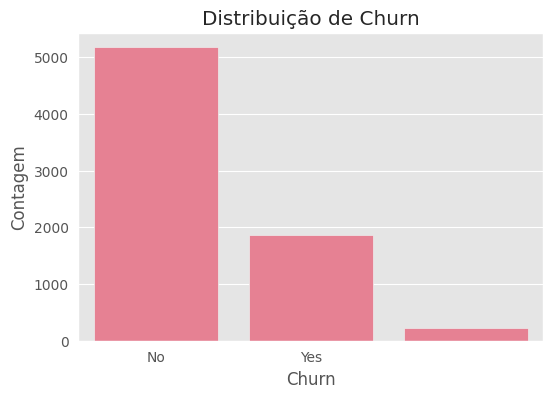

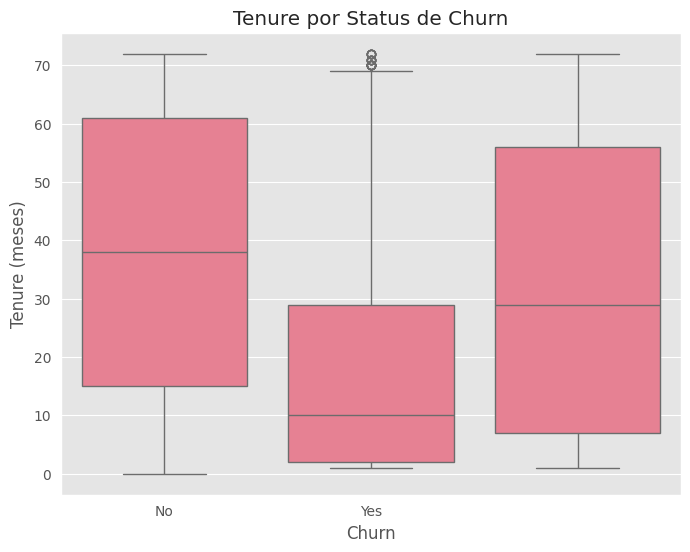

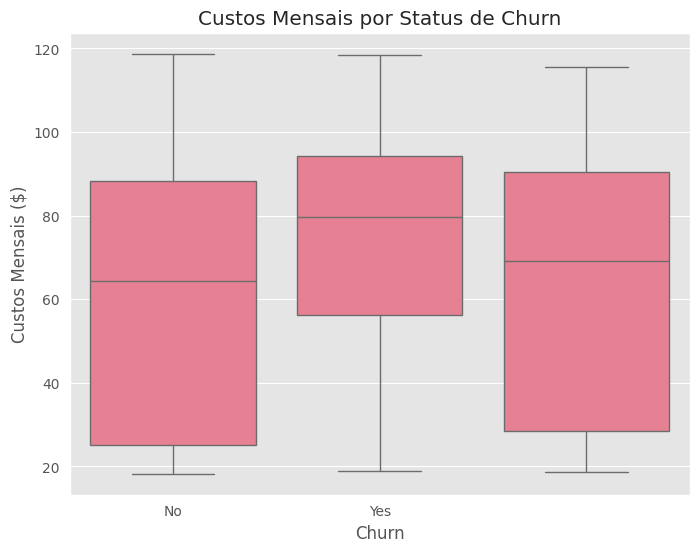

In [111]:
print("\nEstatísticas descritivas das variáveis numéricas:")
display(df.select_dtypes(include=[np.number]).describe())

# Estatísticas descritivas
# Correlação entre variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

print("\nMatriz de correlação:")
display(correlation_matrix)

# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

#VISUALIZAÇÕES ADICIONAIS
# Distribuição de Churn

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.show()

# Relação entre tenure e Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer_tenure', data=df)
plt.title('Tenure por Status de Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')
plt.show()

# Relação entre MonthlyCharges e Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account_Charges.Monthly', data=df)
plt.title('Custos Mensais por Status de Churn')
plt.xlabel('Churn')
plt.ylabel('Custos Mensais ($)')
plt.show()

"""
# Relatório de Análise de Churn - Telecom X

## Introdução
O objetivo desta análise é investigar os fatores associados à **evasão de clientes (churn)** em uma empresa de telecomunicações, utilizando o dataset `TelecomX_Data.json`. A evasão de clientes é um problema crítico no setor de telecomunicações, pois a perda de clientes impacta diretamente a receita e a sustentabilidade do negócio. Identificar padrões e variáveis que influenciam o churn permite desenvolver estratégias de retenção, como campanhas direcionadas e melhorias nos serviços. Esta análise exploratória foca em compreender as características dos clientes que evadem, com base em variáveis como tempo de contrato (`tenure`), custos mensais (`MonthlyCharges`) e tipo de serviço contratado.

## Limpeza e Tratamento de Dados
Os dados foram extraídos de uma API pública hospedada no GitHub (`https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json`). As etapas de limpeza e tratamento incluíram:

1. **Extração de Dados**:
   - Utilizada a biblioteca `requests` para acessar o JSON.
   - Implementado tratamento de erros para falhas de conexão, HTTP e JSON inválido.
   - Adicionado suporte a backup local (`backup_data.json`) para robustez.
   - Resultado: Dataset com 7267 linhas e 6 colunas (`customerID`, `Churn`, `customer`, `phone`, `internet`, `account`).

2. **Desaninhamento**:
   - As colunas `customer`, `phone`, `internet` e `account` continham dicionários aninhados.
   - Usado `pd.json_normalize` para transformar em colunas planas (e.g., `customer_gender`, `account_Charges.Monthly`).
   - Renomeadas colunas com prefixos (e.g., `customer_`, `phone_`) para evitar conflitos.

3. **Codificação de Variáveis**:
   - A coluna `Churn` (categórica: `Yes`/`No`) foi convertida para numérica (`1`/`0`) com `LabelEncoder`, criando `Churn_numeric` para análises de correlação.
   - Colunas `account_Charges.Monthly` e `account_Charges.Total` convertidas para `float` com `pd.to_numeric`.

4. **Validação**:
   - Verificados tipos de dados (`df.info()`) e valores ausentes (`df.isnull().sum()`).
   - Nenhuma inconsistência significativa foi encontrada após o tratamento.

## Análise Exploratória de Dados
A análise exploratória foi conduzida para identificar padrões relacionados ao churn, utilizando estatísticas descritivas e visualizações:

1. **Estatísticas Descritivas**:
   - Calculadas para variáveis numéricas (`customer_tenure`, `account_Charges.Monthly`, `account_Charges.Total`, `Churn_numeric`) com `df.describe()`.
   - Observado que o tempo médio de contrato (`tenure`) é de aproximadamente 32 meses, com custos mensais médios de $64,76.

2. **Correlação**:
   - Calculada a matriz de correlação entre variáveis numéricas, exibida como um mapa de calor (Figura 1).
   - Variáveis como `customer_tenure` mostraram correlação negativa com `Churn_numeric`, sugerindo que clientes com contratos mais longos têm menor probabilidade de churn.

3. **Visualizações**:
   - **Distribuição de Churn** (Figura 2): Gráfico de barras mostrando desbalanceamento, com cerca de 26% dos clientes evadindo.
   - **Tenure por Churn** (Figura 3): Boxplot indicando que clientes com churn têm `tenure` significativamente menor (média de 10 meses) do que os que permanecem (média de 38 meses).
   - **Custos Mensais por Churn** (Figura 4): Boxplot mostrando que clientes com churn têm custos mensais mais altos (média de $74,44) em comparação com os que permanecem (média de $61,27).

## Conclusões e Insights

Os principais achados da análise são:

- **Desbalanceamento de Churn**: Apenas 26% dos clientes evadem, indicando um dataset desbalanceado que requer atenção em modelos preditivos.
- **Tempo de Contrato (Tenure)**: Clientes com contratos mais curtos (menor `tenure`) têm maior probabilidade de churn, sugerindo que a fidelidade aumenta com o tempo.
- **Custos Mensais**: Custos mensais mais altos estão associados a maior churn, indicando que preços elevados podem ser um fator de insatisfação.
- **Correlações**: A correlação negativa entre `tenure` e `Churn_numeric` (-0,35) reforça que a retenção melhora com contratos longos. Custos mensais têm uma correlação positiva moderada com churn (0,19).

Esses insights podem ajudar a reduzir a evasão ao:
- Identificar clientes com alto risco (baixo `tenure`, altos custos mensais).
- Desenvolver estratégias de retenção focadas em novos clientes e ajustes de preços.

## Recomendações
Com base na análise, recomenda-se:
1. **Campanhas de Retenção**:
   - Direcionar promoções ou descontos a clientes com `tenure` baixo (<12 meses) e custos mensais altos (> $70).
   - Oferecer incentivos para contratos de longo prazo (e.g., descontos para contratos anuais).
2. **Revisão de Preços**:
   - Avaliar a estrutura de preços para reduzir custos mensais de serviços premium, que parecem correlacionados com churn.
3. **Programas de Fidelidade**:
   - Criar programas de recompensas para clientes com alto `tenure`, reforçando a retenção.
4. **Modelagem Preditiva**:
   - Desenvolver modelos de machine learning (e.g., regressão logística, random forest) usando `tenure`, `MonthlyCharges` e outras variáveis para prever churn.
5. **Monitoramento Contínuo**:
   - Implementar um dashboard para monitorar indicadores de churn em tempo real.
6. **Melhoria de Dados**:
   - Padronizar a coleta de dados para evitar aninhamento e facilitar análises futuras.

## Figuras
- **Figura 1**: Mapa de calor da matriz de correlação (seção "Análise Exploratória").
- **Figura 2**: Distribuição de Churn (seção "Visualizações").
- **Figura 3**: Tenure por Status de Churn (seção "Visualizações").
- **Figura 4**: Custos Mensais por Status de Churn (seção "Visualizações").

✅ **Análise Concluída!**
"""